In [128]:
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import re
import seaborn as sns
from tqdm import tqdm
import tifffile as tif
import cv2

In [129]:
data_path = '/Users/aichah/Desktop/TLI/data/subtypeC/211104_P36_N1/211104_P36_N1_GFP.tif'
mask_path = '/Users/aichah/Desktop/TLI/data/subtypeC/211104_P36_N1/211104_P36_N1_JESUS_mask.tif'
plot_name = '/Users/aichah/Desktop/TLI/data/subtypeC/211104_P36_N1/211104_P36_N1_JESUS_mask.pdf'
plot_title = 'Weighted centroid for ' + os.path.basename(plot_name).split('.')[0]

In [130]:
neuron = tif.imread(data_path)
mask = tif.imread(mask_path)
neuron.shape, neuron.min(), neuron.max()

((89, 54, 400, 400), 32768, 37424)

In [131]:
neuron -= neuron.min()
neuron[mask==0] = 0

In [132]:
neuron.shape, neuron.min(), neuron.max()

((89, 54, 400, 400), 0, 4626)

In [133]:
images = neuron.max(axis=1)

In [134]:
images.shape

(89, 400, 400)

In [135]:
# images = list 2D image at time point t
vmin, vmax= 0,90
norm = colors.Normalize(vmin=vmin, vmax=vmax)
p = plt.get_cmap('gist_ncar')

xs = []
ys = []
for t in images:

    mo = cv2.moments(t,binaryImage=False)

    xs.append(mo['m10']/mo['m00'])
    ys.append(mo['m01']/mo['m00'])

xs_1 = np.array(xs) - xs[0]
ys_1 = np.array(ys) - ys[0]
labels = range(len(images))

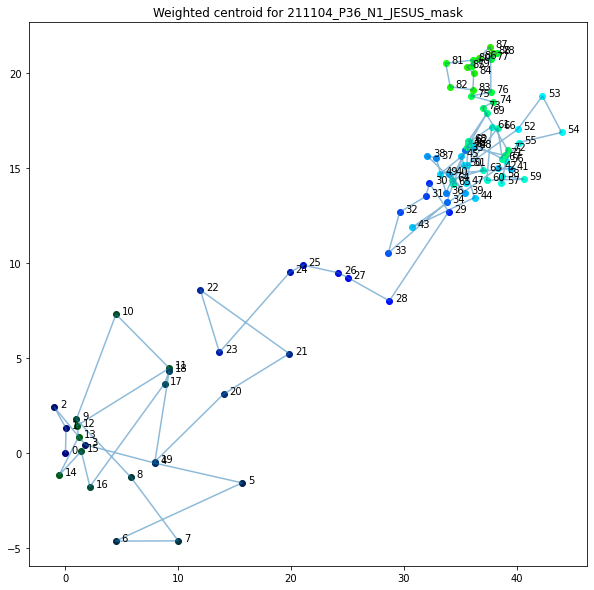

In [136]:
fig, ax = plt.subplots(figsize = (10,10))

ax.set_title(plot_title)
ax.plot(xs_1,ys_1, alpha=0.5)
for i, label in enumerate(labels):
    ax.scatter(xs_1[i], ys_1[i], color = p(label))
    ax.annotate(label, (xs_1[i]+0.5, ys_1[i]))
# plt.savefig(plot_name)

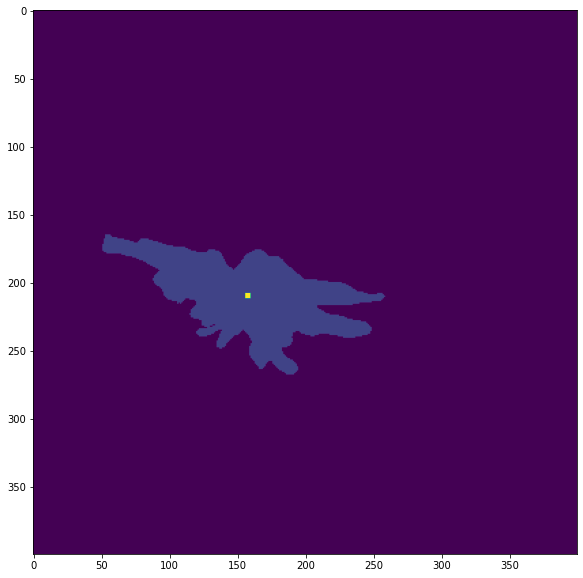

In [143]:
i = 0
test = images[0].copy()
test[test!=0] = 1
test[int(ys[i])-2:int(ys[i])+2,int(xs[i])-2:int(xs[i])+2] = 5

fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(test)